In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data collection and analysis

In [3]:
df=pd.read_csv('medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
#let's check the top five rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
#let's check the shape of data
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
#Checking the null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
#statistical summary of dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


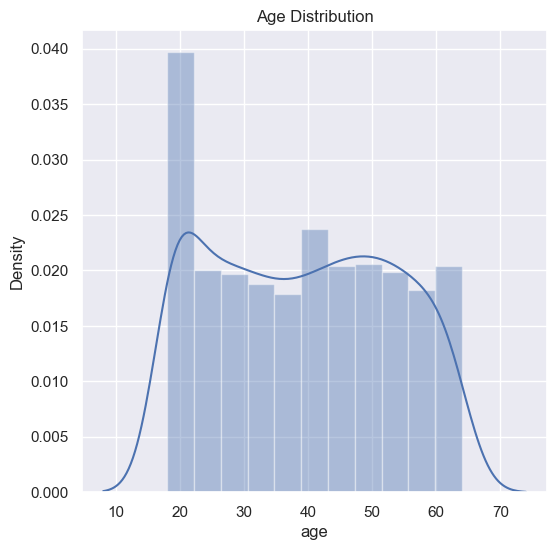

In [15]:
#distribution of age value
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

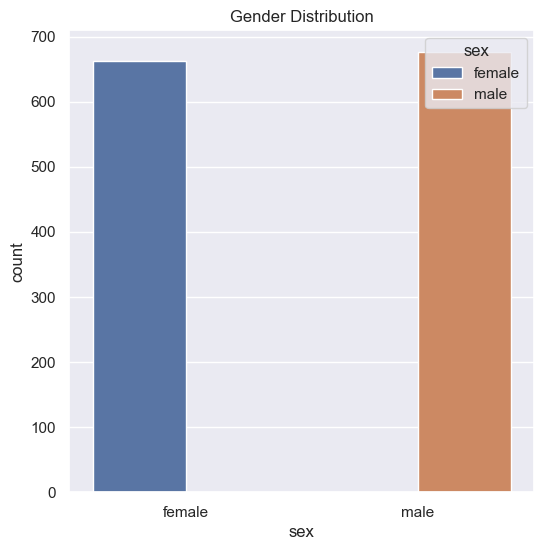

In [19]:
#for gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df,hue='sex')
plt.title('Gender Distribution')
plt.show()

In [18]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

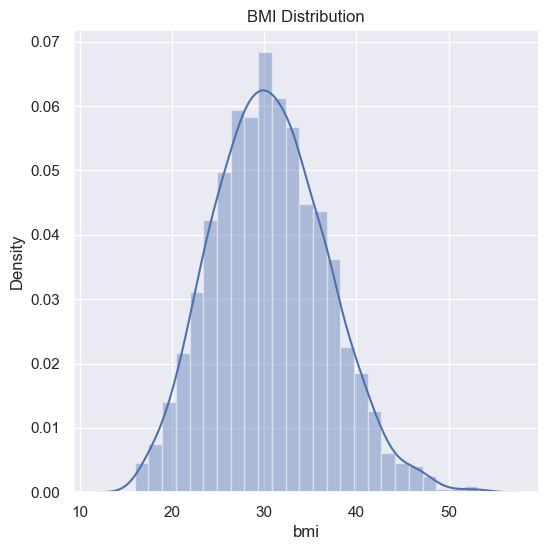

In [20]:
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

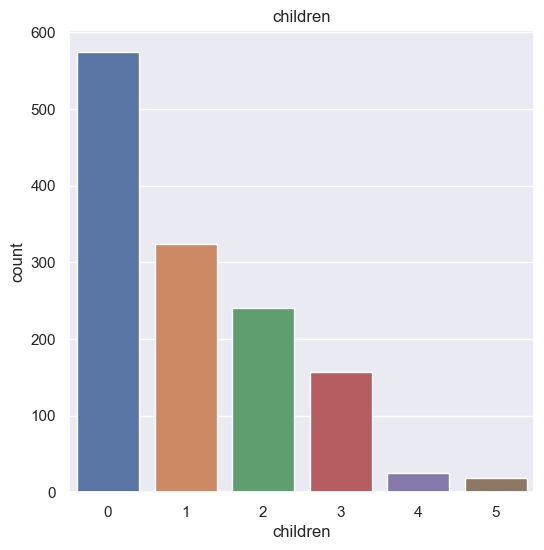

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.title('children')
plt.show()

In [22]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

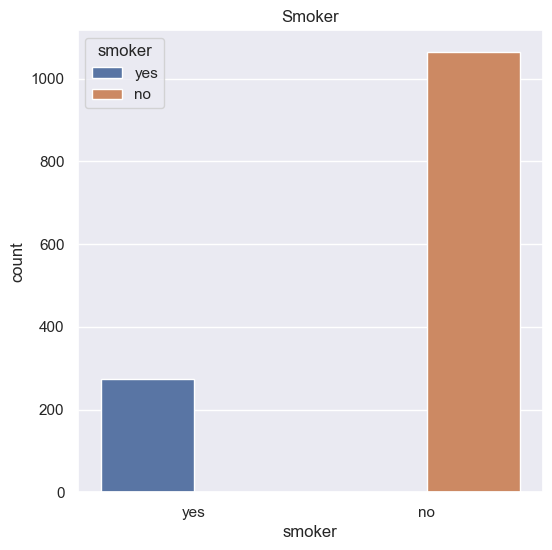

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df,hue='smoker')
plt.title('Smoker')
plt.show()

In [25]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

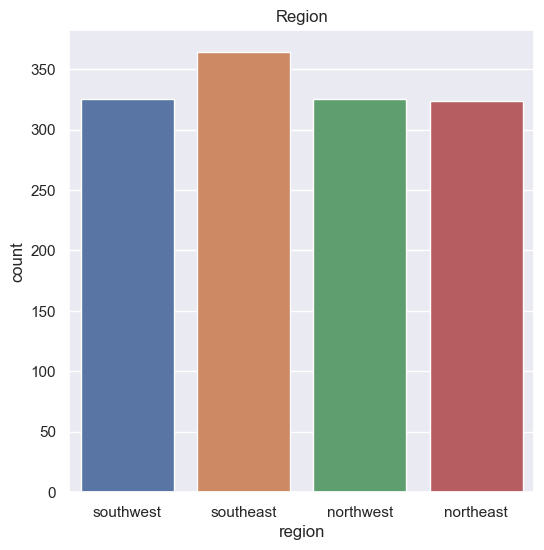

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title('Region')
plt.show()

In [27]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

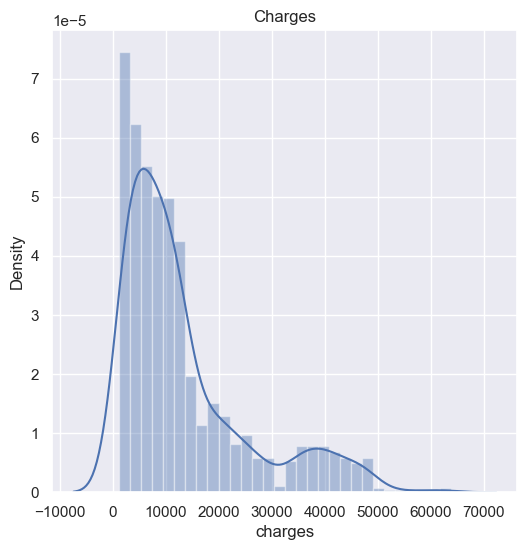

In [28]:
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges')
plt.show()

# Data preprocessing

In [29]:
#encoding the gender column
df.replace({'sex':{'male':0,'female':1}},inplace=True)

#encoding the smoker column
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

#encoding the region column
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [30]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,0,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [31]:
x=df.drop(columns='charges',axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,0
2,28,0,33.000,3,0,0
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,0
1336,21,1,25.800,0,0,1


In [32]:
y=df['charges']

In [33]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# splitting the data into training and testing data

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [35]:
x.shape

(1338, 6)

In [36]:
x_train.shape

(936, 6)

In [37]:
x_test.shape

(402, 6)

# Model training

In [39]:
Lr=LinearRegression()
Lr.fit(x_train,y_train)

LinearRegression()

# Model Evaluation

In [40]:
#prediction on training data
training_data_prediction=Lr.predict(x_train)

In [42]:
# R squared value
r2_train=metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.7420525866105764


In [43]:
#prediction on testing data
testing_data_prediction=Lr.predict(x_test)
r2_test=metrics.r2_score(y_test,testing_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7664939443661303


Building a predictive system

In [49]:
input_data=(37,0,28.025,2,0,2)

#changing input data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=Lr.predict(input_data_reshaped)

print(prediction)

[7646.3483035]
